# Monty Hall Problem

> Suppose you're on a game show, and you're given the choice of three doors:
> Behind one door is a car; behind the others, goats.
> You pick a door, say No. 1, and the host, who knows what's behind the doors,
> opens another door, say No. 3, which has a goat. He then says to you,
> "Do you want to pick door No. 2?"
>
> Is it to your advantage to switch your choice?
https://en.wikipedia.org/wiki/Monty_hall_problem

This notebook shows how the odds vary with the number of doors in the problem.

In [1]:
%matplotlib inline
from random import shuffle,choice
import matplotlib.pyplot as plt
from numpy import vectorize, linspace, logspace, newaxis, transpose, ones
from mpl_toolkits.mplot3d import Axes3D

In [2]:
@vectorize
def simulate(numDoors, removals, games, switch=True):
    """
    Count successes for a number of games
    numDoors = total number of doors
    removals = total number of doors revealed by the host
    games    = the number of games to simulate
    switch   = whether the player chooses to switch
    """
    wins = 0

    doors = ['Goat'] * (int(numDoors) - 1) + ['Tommy Wiseau']

    for i in range(int(games)):
        if play(doors[::], switch=switch, removals=removals):
            wins += 1

    return wins

In [3]:
def play(doors, removals=1, switch=True):
    """
    Simulate one iteration of the game
    Doors is a list of what is behind each door at the start
    and is directly modified by this function
    removals = the number of goats the host reveals
    switch   = whether the player chooses to switch
    """
    first_choice = choice(doors)

    if not switch:
        return first_choice != 'Goat'

    doors.remove(first_choice) # Remove one of whatever they chose, so we won't choose the same one again

    # Host removes some goats and player picks another.
    for i in range(int(removals)):
        try:
            doors.remove('Goat')
        except ValueError:
            break

    # If host removed all the goats, they still lose
    if not doors:
        return False

    final_choice = choice(doors)

    return final_choice != 'Goat'

In [4]:
def vary_doors(doors, removals):
    """
    Vary the number of doors and the number of goats removed
    And calculate the success rate of each strategy as a 2D numpy array
    """
    d = doors[:, newaxis] * ones(len(removals))
    r = transpose(removals[:, newaxis] * ones(len(doors)))
    games = ones(r.shape) * 500
    switch = simulate(d, r, games, True)
    stick  = simulate(d, r, games, False)

    return d, r, switch, stick

In [5]:
def plot(x, y, z,title='', labels=None):
    """Plot a 2D surface and show it"""
    fig = plt.figure()
    fig.suptitle(title)
    ax = Axes3D(fig)
    ax.plot_surface(x, y, z)
    
    if labels:
        xlabel, ylabel, zlabel = labels
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.set_zlabel(zlabel)

    plt.show()

In [6]:
# Plot some stuff
d = 3 * logspace(0, 1.5, 50)
r = linspace(1, max(d)-1, max(d)-1)
x, y, z1, z2 = vary_doors(d, r)

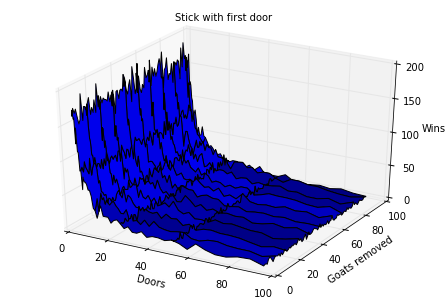

In [8]:
plot(x, y, z2, title='Stick with first door', labels=('Doors', 'Goats removed', 'Wins'))

If you have lots of doors, sticking with your first choice gives you a very
low success rate. It doesn't matter how many doors Monty removes,
because he will never touch your door, so its probability of containing
goat is unchanged.

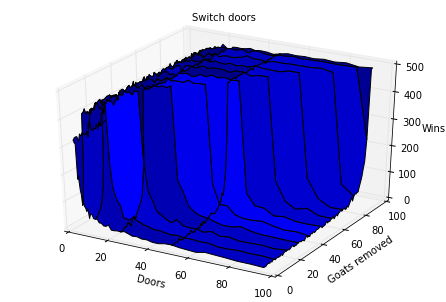

In [7]:
plot(x, y, z1, title='Switch doors', labels=('Doors', 'Goats removed', 'Wins'))

On the other hand, switching will always increase your chances, and your success rate gets better the more goats are revealed.